In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('train.csv', parse_dates=['date'])

In [3]:
# Feature engineering
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [4]:
# Aggregating sales by date and store
sales_data = df.groupby(['date', 'store'])['sales'].sum().reset_index()



In [5]:
# Add the feature columns to the sales_data DataFrame
sales_data = sales_data.merge(df[['date', 'store', 'day_of_week', 'month', 'year', 'is_weekend']].drop_duplicates(), on=['date', 'store'])






In [6]:
# Prepare features and target
X = sales_data[['store', 'day_of_week', 'month', 'year', 'is_weekend']]
y = sales_data['sales']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# List of algorithms to compare
models = [
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Linear Regression', LinearRegression()),
    ('K-Nearest Neighbors', KNeighborsRegressor())
]

In [8]:
# Dictionary to store MAE for each model
mae_scores = {}

Random Forest - Mean Absolute Error: 467.6781039397766


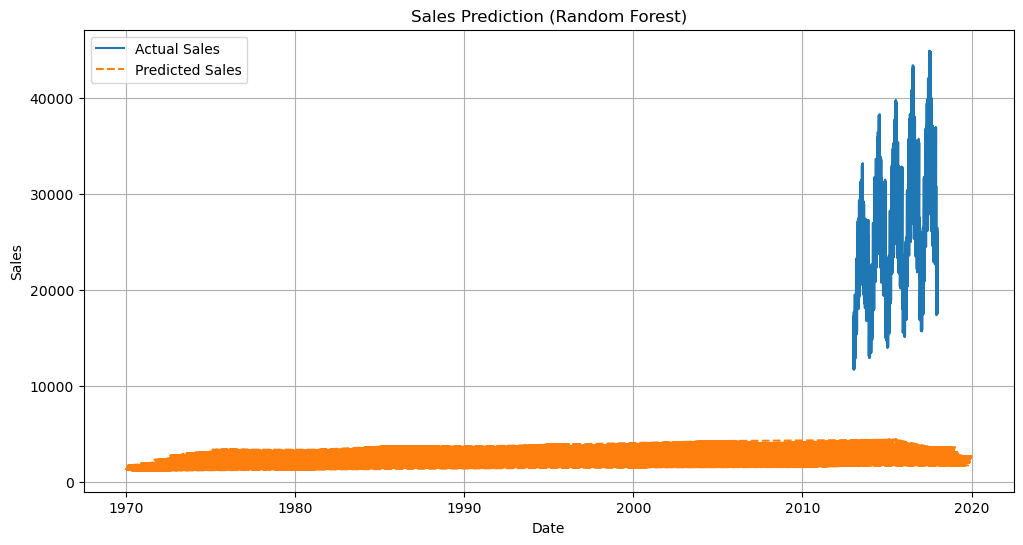

Linear Regression - Mean Absolute Error: 591.5972137107299


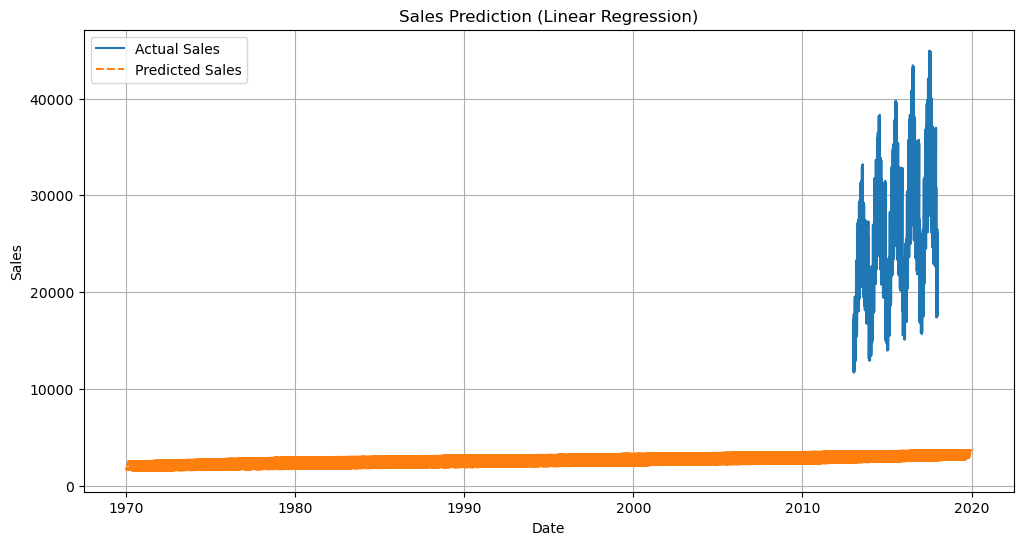

K-Nearest Neighbors - Mean Absolute Error: 484.99123767798466


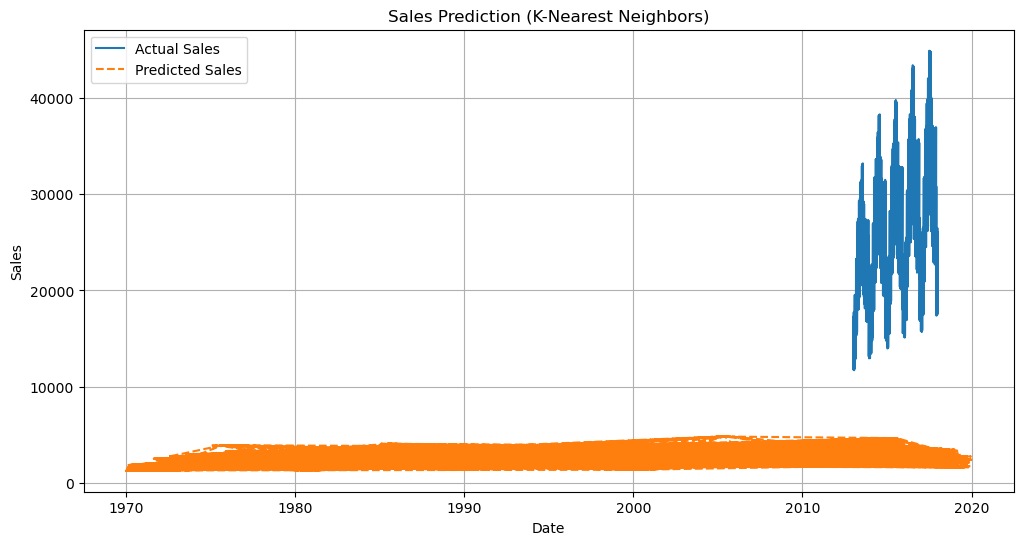

In [16]:

# Training and evaluation loop
for name, model in models:
    # Model training
    model.fit(X_train.drop(['store'], axis=1), y_train)  # Drop 'store' column for training

    # Prediction
    y_pred = model.predict(X_test.drop(['store'], axis=1))  # Drop 'store' column for prediction

    # Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores[name] = mae

    # Print MAE for each model
    print(f"{name} - Mean Absolute Error: {mae}")

 # Plotting actual vs predicted sales
    plt.figure(figsize=(12, 6))
    
    # Actual sales plot
    actual_sales = sales_data.groupby('date')['sales'].sum()
    plt.plot(actual_sales.index, actual_sales.values, label='Actual Sales')

    # Predicted sales plot aligned with dates from X_test
    predicted_dates = X_test.index  # Assuming X_test is indexed by date or has a date-like index
    plt.plot(predicted_dates, y_pred, label='Predicted Sales', linestyle='--')

    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title(f'Sales Prediction ({name})')
    plt.legend()
    plt.grid(True)
    plt.show()


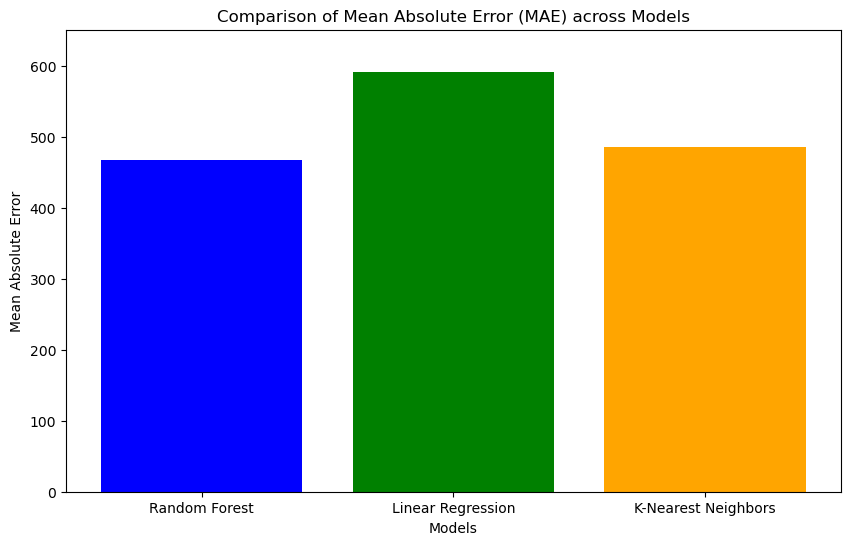

In [17]:

plt.figure(figsize=(10, 6))
plt.bar(mae_scores.keys(), mae_scores.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Mean Absolute Error (MAE) across Models')
plt.ylim(0, max(mae_scores.values()) * 1.1)  # Adjust y-axis limit for better visualization
plt.show()
   